# jobflow

https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

## Define workflow with jobflow

In [1]:
import os

In [2]:
from jobflow import job, Flow

from python_workflow_definition.jobflow import write_workflow_json

In [3]:
from workflow import (
    generate_mesh as _generate_mesh, 
    convert_to_xdmf as _convert_to_xdmf,
    poisson as _poisson,
    plot_over_line as _plot_over_line,
    substitute_macros as _substitute_macros,
    compile_paper as _compile_paper,
)

In [4]:
generate_mesh = job(_generate_mesh)
convert_to_xdmf = job(_convert_to_xdmf)
poisson = job(_poisson)
plot_over_line = job(_plot_over_line)
substitute_macros = job(_substitute_macros)
compile_paper = job(_compile_paper)

In [5]:
source_directory = os.path.abspath(os.path.join(os.curdir, "source"))

In [6]:
domain_size = 2.0

In [7]:
gmsh_output_file = generate_mesh(
    domain_size=domain_size,
    source_directory=source_directory,
)

In [8]:
meshio_output_dict = convert_to_xdmf(
    gmsh_output_file=gmsh_output_file.output,
)

In [9]:
poisson_dict = poisson(
    meshio_output_xdmf=meshio_output_dict.output.xdmf_file, 
    meshio_output_h5=meshio_output_dict.output.h5_file,
    source_directory=source_directory,
)

In [10]:
pvbatch_output_file = plot_over_line(
    poisson_output_pvd_file=poisson_dict.output.pvd_file, 
    poisson_output_vtu_file=poisson_dict.output.vtu_file,
    source_directory=source_directory,
)

In [11]:
macros_tex_file = substitute_macros( 
    pvbatch_output_file=pvbatch_output_file.output, 
    ndofs=poisson_dict.output.numdofs, 
    domain_size=domain_size,
    source_directory=source_directory,
)

In [12]:
paper_output = compile_paper(
    macros_tex=macros_tex_file.output, 
    plot_file=pvbatch_output_file.output,
    source_directory=source_directory,
)

In [13]:
flow = Flow([gmsh_output_file, meshio_output_dict, poisson_dict, pvbatch_output_file, macros_tex_file, paper_output])

In [14]:
workflow_json_filename = "jobflow_nfdi.json"

In [15]:
write_workflow_json(flow=flow, file_name=workflow_json_filename)

## Load Workflow with aiida

In [16]:
from aiida import load_profile

load_profile()

Profile<uuid='3ce302a995914d2e8a7b6327a10fe381' name='pwd'>

In [17]:
from python_workflow_definition.aiida import load_workflow_json

In [18]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [19]:
wg.run()

05/24/2025 05:44:19 AM <3034> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [51|WorkGraphEngine|continue_workgraph]: tasks ready to run: generate_mesh1
05/24/2025 05:44:21 AM <3034> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [51|WorkGraphEngine|update_task_state]: Task: generate_mesh1, type: PyFunction, finished.
05/24/2025 05:44:21 AM <3034> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [51|WorkGraphEngine|continue_workgraph]: tasks ready to run: convert_to_xdmf2
05/24/2025 05:44:22 AM <3034> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [51|WorkGraphEngine|update_task_state]: Task: convert_to_xdmf2, type: PyFunction, finished.
05/24/2025 05:44:22 AM <3034> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [51|WorkGraphEngine|continue_workgraph]: tasks ready to run: poisson3
05/24/2025 05:44:25 AM <3034> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [51|WorkGrap

## Load Workflow with pyiron_base

In [20]:
from python_workflow_definition.pyiron_base import load_workflow_json

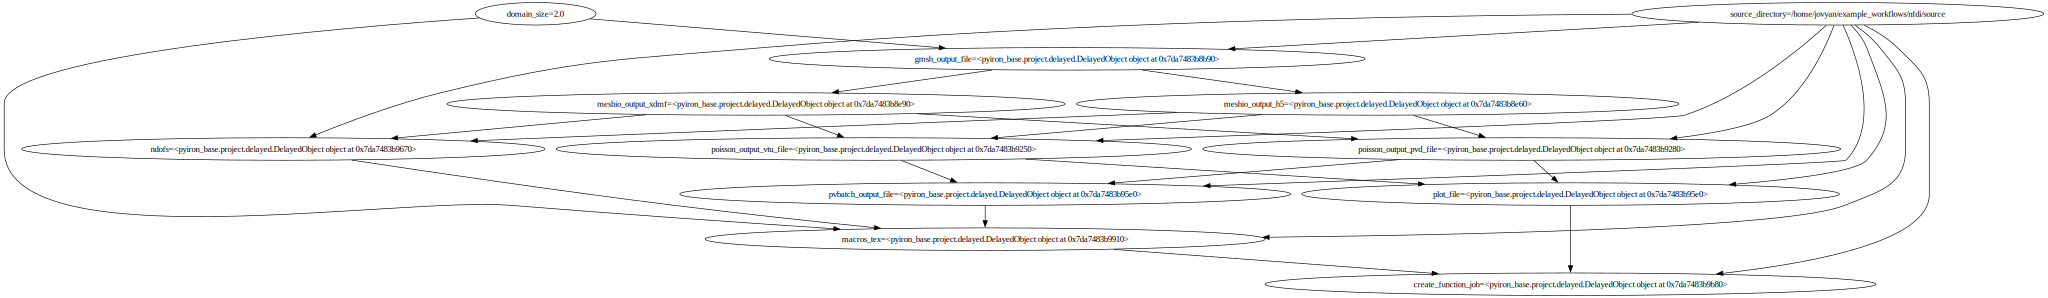

In [21]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [22]:
delayed_object_lst[-1].pull()

The job generate_mesh_47725c16637f799ac042e47468005db3 was saved and received the ID: 1
The job convert_to_xdmf_d6a46eb9a4ec352aa996e783ec3c785f was saved and received the ID: 2
The job poisson_3c147fc86db87cf0c0f94bda333f8cd8 was saved and received the ID: 3
The job plot_over_line_ef50933291910dadcc8311924971e127 was saved and received the ID: 4
The job substitute_macros_63766eafd6b1980c7832dd8c9a97c96e was saved and received the ID: 5
The job compile_paper_128d1d58374953c00e95b8de62cbb10b was saved and received the ID: 6


'/home/jovyan/example_workflows/nfdi/postprocessing/paper.pdf'